In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/sample_submission.csv
/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/train.csv
/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/test.csv


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# loading dataset

In [3]:
df=pd.read_csv('/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/train.csv')
test_df= pd.read_csv('/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/test.csv')


In [4]:
print(df.head(10))

   id    airline    flight     source      departure stops  arrival  \
0   0    Vistara    UK-930     Mumbai  Early_Morning   one    Night   
1   1  Air_India    AI-539    Chennai        Evening   one  Morning   
2   2   SpiceJet   SG-8107      Delhi  Early_Morning  zero  Morning   
3   3        NaN  0.00E+00  Hyderabad  Early_Morning  zero  Morning   
4   4  Air_India    AI-569    Chennai  Early_Morning   one  Morning   
5   5    AirAsia    I5-620     Mumbai  Early_Morning   one  Morning   
6   6   SpiceJet   SG-3027  Bangalore            NaN   one    Night   
7   7     Indigo  0.00E+00    Chennai        Evening   one    Night   
8   8     Indigo  0.00E+00    Kolkata        Morning   one  Evening   
9   9   GO_FIRST   G8-1404      Delhi        Morning   one  Evening   

  destination     class  duration  days_left  price  
0     Chennai  Business       NaN       40.0  64173  
1      Mumbai   Economy     16.08       26.0   4357  
2     Chennai   Economy      2.92       25.0   3251  
3 

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [5]:
print(df.tail(10))

          id    airline    flight     source      departure stops    arrival  \
39990  39990    AirAsia   I5-1228  Bangalore  Early_Morning  zero    Morning   
39991  39991    Vistara    UK-810  Bangalore  Early_Morning   one    Evening   
39992  39992  Air_India    AI-491      Delhi        Morning   one  Afternoon   
39993  39993        NaN    UK-870  Hyderabad          Night   one    Evening   
39994  39994     Indigo  0.00E+00    Chennai        Morning   one  Afternoon   
39995  39995    Vistara    UK-940     Mumbai            NaN   one    Evening   
39996  39996    Vistara    UK-720    Kolkata  Early_Morning   one      Night   
39997  39997        NaN    UK-874  Hyderabad        Morning   one      Night   
39998  39998    Vistara    UK-940     Mumbai            NaN   one      Night   
39999  39999   GO_FIRST    G8-511     Mumbai  Early_Morning   one    Evening   

      destination     class  duration  days_left  price  
39990     Chennai   Economy      1.00       38.0   1603  
399

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


# Data Types Identification
Check datatypes and summary statistics.



In [6]:
print(df.dtypes)

id               int64
airline         object
flight          object
source          object
departure       object
stops           object
arrival         object
destination     object
class           object
duration       float64
days_left      float64
price            int64
dtype: object


In [7]:
print(df.shape)

(40000, 12)


In [8]:
print(df.columns)

Index(['id', 'airline', 'flight', 'source', 'departure', 'stops', 'arrival',
       'destination', 'class', 'duration', 'days_left', 'price'],
      dtype='object')


# Identify the missing values


In [9]:
print(df.isnull().sum())

id                0
airline        4613
flight            0
source            0
departure      4792
stops          2319
arrival           0
destination       0
class             0
duration       3013
days_left      4438
price             0
dtype: int64


In [10]:
print(df.isnull().mean()*100)

id              0.0000
airline        11.5325
flight          0.0000
source          0.0000
departure      11.9800
stops           5.7975
arrival         0.0000
destination     0.0000
class           0.0000
duration        7.5325
days_left      11.0950
price           0.0000
dtype: float64


# Descriptive Statistics
Details of Numerical Columns: The table above presents count, mean, standard deviation, min, max, and quartiles (25%, 50%, 75%) for each numerical column. The median values are shown in the 50% row.

In [11]:
print(df.describe())

                id      duration     days_left         price
count  40000.00000  36987.000000  35562.000000   40000.00000
mean   19999.50000     12.004088     26.197936   20801.49025
std    11547.14972      7.108063     13.469232   22729.14842
min        0.00000      0.830000      1.000000    1105.00000
25%     9999.75000      6.670000     15.000000    4687.00000
50%    19999.50000     11.080000     26.000000    7353.00000
75%    29999.25000     15.920000     38.000000   42521.00000
max    39999.00000     47.080000     49.000000  114704.00000


In [12]:
print(df.describe(include='object'))

        airline    flight source departure  stops arrival destination    class
count     35387     40000  40000     35208  37681   40000       40000    40000
unique        6       869      6         6      3       6           6        2
top     Vistara  0.00E+00  Delhi   Morning    one   Night      Mumbai  Economy
freq      15063      5240   8189      8302  31439   12348        7821    27536


In [13]:
for col in df.columns:
    print(f"{col}:{df[col].nunique()}unique values")

id:40000unique values
airline:6unique values
flight:869unique values
source:6unique values
departure:6unique values
stops:3unique values
arrival:6unique values
destination:6unique values
class:2unique values
duration:416unique values
days_left:49unique values
price:5875unique values


In [14]:
categorial_cols= df.select_dtypes(include='object').columns

for col in categorial_cols:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())


Value counts for 'airline':
airline
Vistara      15063
Air_India     9222
Indigo        5236
GO_FIRST      2805
AirAsia       1958
SpiceJet      1103
Name: count, dtype: int64

Value counts for 'flight':
flight
0.00E+00    5240
UK-706       448
UK-772       363
UK-720       348
UK-836       337
            ... 
SG-5094        1
SG-1062        1
SG-6017        1
SG-197         1
I5-334         1
Name: count, Length: 869, dtype: int64

Value counts for 'source':
source
Delhi        8189
Mumbai       8139
Bangalore    6947
Kolkata      6168
Hyderabad    5436
Chennai      5121
Name: count, dtype: int64

Value counts for 'departure':
departure
Morning          8302
Early_Morning    7788
Evening          7709
Night            5690
Afternoon        5565
Late_Night        154
Name: count, dtype: int64

Value counts for 'stops':
stops
one            31439
zero            4741
two_or_more     1501
Name: count, dtype: int64

Value counts for 'arrival':
arrival
Night            12348
Evening     

Removing Duplicates
Drop duplicate records to ensure data integrity

In [15]:
print(f"Original training data shape: {df.shape}")
df.drop_duplicates(subset=[i for i in df.columns if i != 'id'], inplace=True)
print(f"After removing duplicates: {df.shape}")

Original training data shape: (40000, 12)
After removing duplicates: (39750, 12)


# Outlier Treatment
Cap outliers in numerical features using the IQR method.



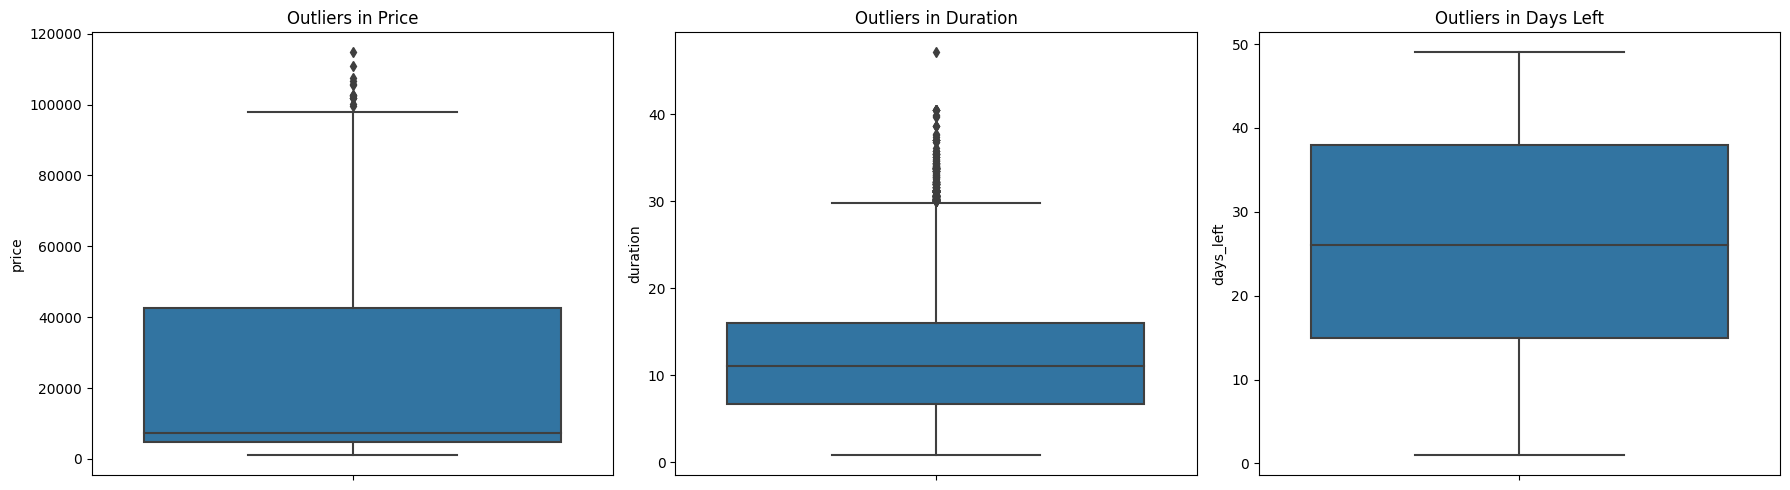

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots to visually spot outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(y=df['price'], ax=axes[0])
axes[0].set_title("Outliers in Price")

sns.boxplot(y=df['duration'], ax=axes[1])
axes[1].set_title("Outliers in Duration")

sns.boxplot(y=df['days_left'], ax=axes[2])
axes[2].set_title("Outliers in Days Left")

plt.tight_layout()
plt.show()

In [17]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Example: Clean 'price'
df_clean = remove_outliers_iqr(df, 'price')
print("Rows before:", df.shape[0], "Rows after:", df_clean.shape[0])

Rows before: 39750 Rows after: 39736


# Exploratory Data Analysis (EDA)
Visualize the target and feature relationships.

Price Distribution

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


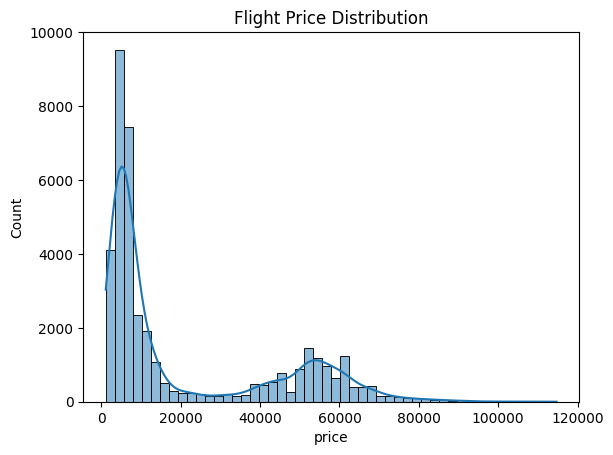

In [18]:
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Flight Price Distribution")
plt.show()

Average Price by Source City (Bar Plot)

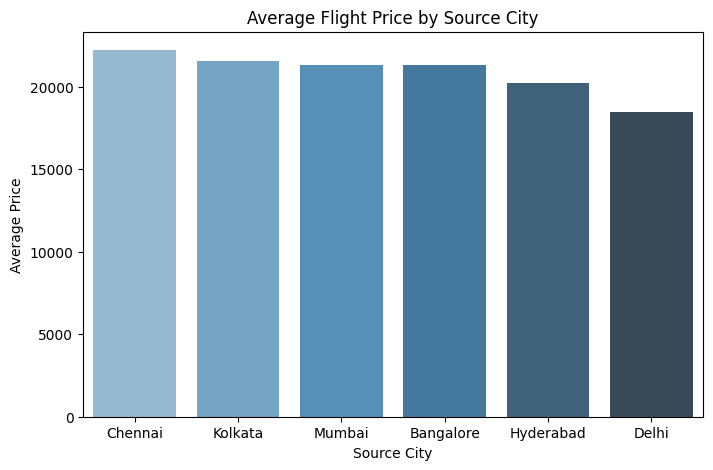

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_price_by_source = df.groupby('source')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_price_by_source.index, y=avg_price_by_source.values, palette='Blues_d')
plt.title("Average Flight Price by Source City")
plt.ylabel("Average Price")
plt.xlabel("Source City")
plt.show()

Flight Count by Departure Time of Day

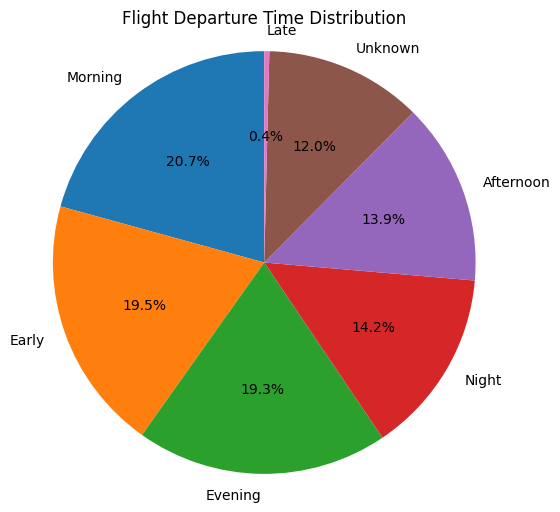

In [20]:
departure_counts = df['departure'].fillna('Unknown').apply(lambda x: x.split('_')[0])
departure_group = departure_counts.value_counts()

plt.figure(figsize=(6,6))
plt.pie(departure_group.values, labels=departure_group.index, autopct='%1.1f%%', startangle=90)
plt.title("Flight Departure Time Distribution")
plt.axis('equal')  # Equal aspect ratio ensures pie is round
plt.show()

# Feature Engineering and Encoding
Explanation for Scaling and Encoding: We standardize numerical features to ensure equal weight and encode categorical features appropriately based on cardinality

In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from lightgbm import LGBMRegressor

# Target and feature separation
target = "price"  # Replace with actual target column
features = [col for col in df.columns if col != target]

X = df[features]
y = df['price']
X_test = test_df[features]

# Identify column types
num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(include="object").columns

# Pipelines
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False))
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, num_cols),
    ("cat", categorical_pipeline, cat_cols)
])

Train-Test Split:

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model Building and Evaluation

In [23]:
'''from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Full pipeline
model = Pipeline([
    ("preprocessing", preprocessor),
    ("regressor", LinearRegression())
])

model.fit(X_train, y_train)'''

'from sklearn.linear_model import LinearRegression\nfrom sklearn.pipeline import make_pipeline\n\n# Full pipeline\nmodel = Pipeline([\n    ("preprocessing", preprocessor),\n    ("regressor", LinearRegression())\n])\n\nmodel.fit(X_train, y_train)'

In [24]:
'''model = Pipeline([
    ("preprocessing", preprocessor),
    ("regressor", GradientBoostingRegressor(
        n_estimators=100,      # Number of boosting stages
        learning_rate=0.1,     # Step size shrinkage
        max_depth=3,           # Depth of individual trees
        random_state=42
    ))
])

# Fit model
model.fit(X_train, y_train)
'''

'model = Pipeline([\n    ("preprocessing", preprocessor),\n    ("regressor", GradientBoostingRegressor(\n        n_estimators=100,      # Number of boosting stages\n        learning_rate=0.1,     # Step size shrinkage\n        max_depth=3,           # Depth of individual trees\n        random_state=42\n    ))\n])\n\n# Fit model\nmodel.fit(X_train, y_train)\n'

In [25]:
''' from sklearn.preprocessing import PolynomialFeatures
 from sklearn.linear_model import LinearRegression
 from sklearn.pipeline import make_pipeline

 model = make_pipeline(
     preprocessor,
     PolynomialFeatures(degree=2),
     LinearRegression()
 )

'''

' from sklearn.preprocessing import PolynomialFeatures\n from sklearn.linear_model import LinearRegression\n from sklearn.pipeline import make_pipeline\n\n model = make_pipeline(\n     preprocessor,\n     PolynomialFeatures(degree=2),\n     LinearRegression()\n )\n\n'

In [26]:
'''model = Pipeline([
    ("preprocessing", preprocessor),
    ("regressor", DecisionTreeRegressor(random_state=42))
])

model.fit(X_train, y_train)
'''

'model = Pipeline([\n    ("preprocessing", preprocessor),\n    ("regressor", DecisionTreeRegressor(random_state=42))\n])\n\nmodel.fit(X_train, y_train)\n'

In [27]:
'''  model = Pipeline([
    ("preprocessing", preprocessor),
    ("regressor", LGBMRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=7,
        random_state=42
    ))
])

# model.fit(X_train, y_train)

'''

'  model = Pipeline([\n    ("preprocessing", preprocessor),\n    ("regressor", LGBMRegressor(\n        n_estimators=100,\n        learning_rate=0.1,\n        max_depth=7,\n        random_state=42\n    ))\n])\n\n# model.fit(X_train, y_train)\n\n'

In [28]:
'''model = Pipeline([
    ("preprocessing", preprocessor),
    ("regressor", XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=42,
        n_jobs=-1
    ))
])

model.fit(X_train, y_train)
'''

'model = Pipeline([\n    ("preprocessing", preprocessor),\n    ("regressor", XGBRegressor(\n        n_estimators=100,\n        learning_rate=0.1,\n        max_depth=5,\n        random_state=42,\n        n_jobs=-1\n    ))\n])\n\nmodel.fit(X_train, y_train)\n'

Hyperparameter Tuning

In [29]:
'''from xgboost import XGBRegressor
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7]
}
grid_xgb = GridSearchCV(XGBRegressor(), param_grid_xgb, cv=3, scoring='neg_mean_squared_error')
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_
'''

"from xgboost import XGBRegressor\nparam_grid_xgb = {\n    'n_estimators': [100, 200],\n    'learning_rate': [0.05, 0.1],\n    'max_depth': [3, 5, 7]\n}\ngrid_xgb = GridSearchCV(XGBRegressor(), param_grid_xgb, cv=3, scoring='neg_mean_squared_error')\ngrid_xgb.fit(X_train, y_train)\nbest_xgb = grid_xgb.best_estimator_\n"

In [30]:
model = Pipeline([
    ("preprocessing", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=30,
        random_state=42,
        n_jobs=-1                # Parallel processing
    ))
])

# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  Index(['id', 'duration', 'days_left'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['airline', 'flight', 'source', 'departure', 'stops', 'arrival',
       'destination', 'class'],
      dtype='object'))])),
                ('regressor',
                 RandomForestRegressor(n_estimators=30, n_jobs=-1,
                                       random_state=42))])


Hyperparameter Tuning

In [31]:
'''from sklearn.model_selection import GridSearchCV

param_grid = {
    "regressor__n_estimators": [50, 200],
    "regressor__max_depth": [5, 20],
    "regressor__min_samples_split": [2, 5]
}

grid = GridSearchCV(model, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)
'''

'from sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    "regressor__n_estimators": [50, 200],\n    "regressor__max_depth": [5, 20],\n    "regressor__min_samples_split": [2, 5]\n}\n\ngrid = GridSearchCV(model, param_grid, cv=3, scoring=\'neg_root_mean_squared_error\')\ngrid.fit(X_train, y_train)\n'

Evaluate on Validation Set

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#y_pred = model.predict(X_val)
#print("Validation R² Score:", r2_score(y_val, y_pred))
#print("Validation RMSE:", np.sqrt(mean_squared_error(y_val, y_pred)))

model.fit(X_train, y_train)
y_pred = model.predict(X_val)

print("RMSE:", mean_squared_error(y_val, y_pred, squared=False))
print("R² Score:", r2_score(y_val, y_pred))


RMSE: 3824.78772347912
R² Score: 0.9723868538846288


# Predict

In [33]:
y_test_pre = model.predict(X_test)

# Submission File

In [34]:
# Match the submission to the test data
submission = pd.DataFrame({
    'id': test_df['id'],      # replace 'id' if your ID column is named differently
    'price': y_test_pre
})

submission.to_csv("/kaggle/working/submission.csv", index=False)
submission

,id,price
0,0,4722.833333
1,1,10541.600000
2,2,4919.833333
3,3,60723.166667
4,4,45813.400000
...,...,...
9995,9995,4113.600000
9996,9996,8582.466667
9997,9997,67102.733333
9998,9998,56978.166667
